In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('car.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [11]:
df['fuel'].unique().tolist()

['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric']

In [12]:
df['seller_type'].unique().tolist()

['Individual', 'Dealer', 'Trustmark Dealer']

In [13]:
df['transmission'].unique().tolist()

['Manual', 'Automatic']

In [14]:
df['owner'].unique().tolist()

['First Owner',
 'Second Owner',
 'Fourth & Above Owner',
 'Third Owner',
 'Test Drive Car']

In [19]:
#see correlation, replace everything using replace function.
df.replace({'fuel':{'Petrol':0,'Diesel':1, 'CNG':2, 'LPG':3, 'Electric': 4},'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2},'transmission':{'Manual':0,'Automatic':1},
                      'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}},inplace=True)





/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_47114/3919733591.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Petrol':0,'Diesel':1, 'CNG':2, 'LPG':3, 'Electric': 4},'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2},'transmission':{'Manual':0,'Automatic':1},


In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [24]:
df = df.drop('name', axis = 1)

In [26]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,0,0,0
1,2007,135000,50000,0,0,0,0
2,2012,600000,100000,1,0,0,0
3,2017,250000,46000,0,0,0,0
4,2014,450000,141000,1,0,0,1


In [29]:
model = LinearRegression()

In [32]:
X = df.drop('selling_price', axis = 1)

In [33]:
y = df['selling_price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
train_prediction = model.predict(X_train)

In [41]:
metrics.r2_score(y_train, train_prediction)

0.45232342921289326

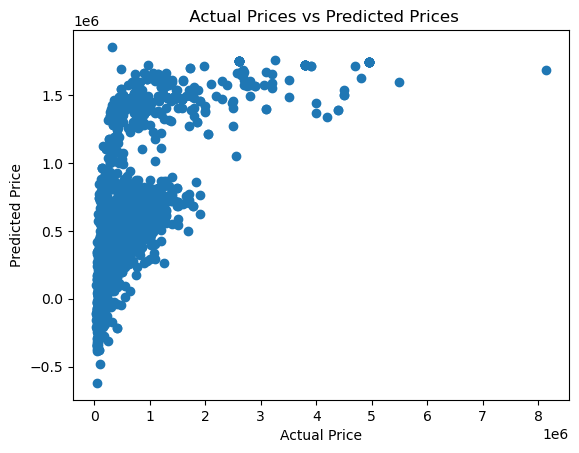

In [42]:
plt.scatter(y_train, train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [43]:
test_prediction = model.predict(X_test)

In [44]:
metrics.r2_score(y_test, test_prediction)

0.38730451601308924

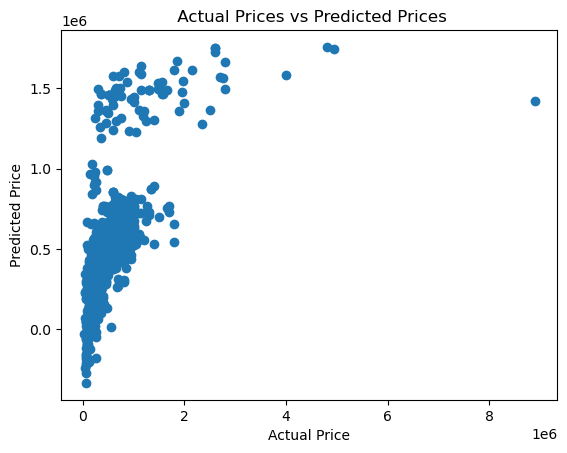

In [45]:
plt.scatter(y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()